In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')


In [ ]:
# Display basic statistics
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.shape

(2823, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
import pandas as pd


In [ ]:

print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [ ]:
df.shape

(2823, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
grouped_data = df.groupby('productline')['msrp'].mean()
print(grouped_data)

productline
Classic Cars        119.885212
Motorcycles          97.069486
Planes               88.767974
Ships                86.128205
Trains               72.987013
Trucks and Buses    102.465116
Vintage Cars         86.461285
Name: msrp, dtype: float64


In [ ]:
grouped = df.groupby('productline')['priceeach'].sum()
print(grouped)

productline
Classic Cars        84453.70
Motorcycles         27472.19
Planes              25012.72
Ships               19622.18
Trains               5825.41
Trucks and Buses    26345.91
Vintage Cars        47435.96
Name: priceeach, dtype: float64


In [ ]:
multi_grouped = df.groupby(['productline', 'dealsize'])['priceeach'].sum()
print(multi_grouped)

productline       dealsize
Classic Cars      Large        9687.78
                  Medium      51418.27
                  Small       23347.65
Motorcycles       Large        1900.00
                  Medium      14847.80
                  Small       10724.39
Planes            Large         880.75
                  Medium      11728.38
                  Small       12403.59
Ships             Medium       9794.90
                  Small        9827.28
Trains            Large         100.00
                  Medium       2398.53
                  Small        3326.88
Trucks and Buses  Large         700.00
                  Medium      17229.32
                  Small        8416.59
Vintage Cars      Large        2400.00
                  Medium      24563.45
                  Small       20472.51
Name: priceeach, dtype: float64


In [ ]:
# Custom aggregation function example using dataset columns
def custom_agg_function(x):
    # Your custom logic here based on the 'price' column
    result = x.mean()  # Replace with your custom aggregation logic, e.g., x.mean() or x.sum()
    return result

In [ ]:
custom_grouped = df.groupby('productline')['priceeach'].agg(custom_agg_function)
custom_grouped

,priceeach
productline,
Classic Cars,87.335781
Motorcycles,82.997553
Planes,81.740915
Ships,83.855470
Trains,75.654675
Trucks and Buses,87.527940
Vintage Cars,78.148204


In [ ]:
# Transform method example using dataset columns
df['mean_price_by_category'] = df.groupby('productline')['priceeach'].transform('mean')
df['mean_price_by_category']

,mean_price_by_category
0,82.997553
1,82.997553
2,82.997553
3,82.997553
4,82.997553
...,...
2818,83.855470
2819,83.855470
2820,83.855470
2821,83.855470


In [ ]:
category_dealsize_stats = df.groupby(['productline', 'dealsize'])[['quantityordered', 'priceeach']].agg({
    'quantityordered': 'mean',
    'priceeach': 'sum'
})

print(category_dealsize_stats)

                           quantityordered  priceeach
productline      dealsize                            
Classic Cars     Large           46.453608    9687.78
                 Medium          36.184906   51418.27
                 Small           30.317647   23347.65
Motorcycles      Large           48.210526    1900.00
                 Medium          38.006410   14847.80
                 Small           30.884615   10724.39
Planes           Large           53.000000     880.75
                 Medium          40.697674   11728.38
                 Small           29.761905   12403.59
Ships            Medium          40.289720    9794.90
                 Small           30.047244    9827.28
Trains           Large           45.000000     100.00
                 Medium          40.461538    2398.53
                 Small           32.300000    3326.88
Trucks and Buses Large           51.142857     700.00
                 Medium          38.725714   17229.32
                 Small      

   dealsize       productline  quantityordered  priceeach
0     Large      Classic Cars        46.453608    9687.78
1     Large       Motorcycles        48.210526    1900.00
2     Large            Planes        53.000000     880.75
3     Large            Trains        45.000000     100.00
4     Large  Trucks and Buses        51.142857     700.00
5     Large      Vintage Cars        46.333333    2400.00
6    Medium      Classic Cars        36.184906   51418.27
7    Medium       Motorcycles        38.006410   14847.80
8    Medium            Planes        40.697674   11728.38
9    Medium             Ships        40.289720    9794.90
10   Medium            Trains        40.461538    2398.53
11   Medium  Trucks and Buses        38.725714   17229.32
12   Medium      Vintage Cars        38.398467   24563.45
13    Small      Classic Cars        30.317647   23347.65
14    Small       Motorcycles        30.884615   10724.39
15    Small            Planes        29.761905   12403.59
16    Small   

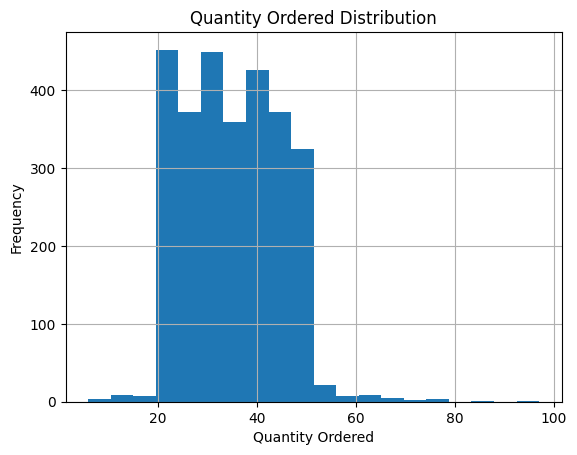

Most common status: Shipped


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'orderdate' column to datetime format
df['invoice_date'] = pd.to_datetime(df['orderdate'], errors='coerce')

# Extract month and year from 'invoice_date'
df['invoice_month'] = df['invoice_date'].dt.month
df['invoice_year'] = df['invoice_date'].dt.year

# Analyze average quantity ordered and total priceeach per deal size and product line
category_stats = df.groupby(['dealsize', 'productline']).agg({
    'quantityordered': 'mean',
    'priceeach': 'sum'
}).reset_index()

print(category_stats)

# Calculate total sales per product line (instead of shopping mall)
total_sales_per_productline = df.groupby('productline')['priceeach'].sum().sort_values(ascending=False)
print(total_sales_per_productline)

# If you want to plot quantity ordered distribution instead of age
df['quantityordered'].hist(bins=20)
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.title('Quantity Ordered Distribution')
plt.show()

# If you want the most common status (instead of payment method)
popular_status = df['status'].mode().values[0]
print("Most common status:", popular_status)


In [ ]:
# 'invoice_date' is the column containing timestamps
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Group by month and sum the 'price' column
time_grouped = df.groupby(pd.Grouper(key='invoice_date', freq='M'))['priceeach'].sum()
df['invoice_date']

<ipython-input-79-2895edb55ba4>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_grouped = df.groupby(pd.Grouper(key='invoice_date', freq='M'))['priceeach'].sum()


,invoice_date
0,2003-02-24
1,2003-05-07
2,2003-07-01
3,2003-08-25
4,2003-10-10
...,...
2818,2004-12-02
2819,2005-01-31
2820,2005-03-01
2821,2005-03-28


In [ ]:
time_grouped = df.groupby(pd.Grouper(key='invoice_date', freq='ME'))['priceeach'].sum()

print(time_grouped)

invoice_date
2003-01-31     3203.31
2003-02-28     3441.55
2003-03-31     4086.67
2003-04-30     4925.11
2003-05-31     4753.17
2003-06-30     3879.33
2003-07-31     4310.41
2003-08-31     4826.26
2003-09-30     6407.33
2003-10-31    13367.06
2003-11-30    24717.89
2003-12-31     5875.05
2004-01-31     7576.40
2004-02-29     7222.72
2004-03-31     4686.99
2004-04-30     5281.88
2004-05-31     6282.94
2004-06-30     6994.18
2004-07-31     7795.36
2004-08-31    11147.85
2004-09-30     7870.55
2004-10-31    13246.16
2004-11-30    25272.54
2004-12-31     9110.53
2005-01-31     8332.07
2005-02-28     8238.22
2005-03-31     8658.95
2005-04-30     4556.29
2005-05-31    10101.30
Freq: ME, Name: priceeach, dtype: float64


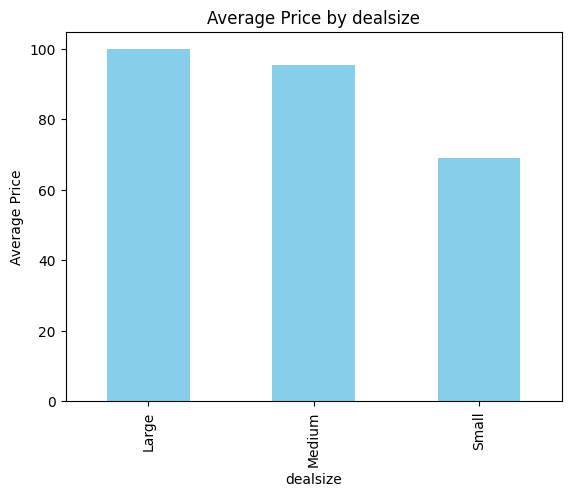

In [ ]:
# Change it to the column you are interested in
grouped_data = df.groupby('dealsize')['priceeach'].mean()

# Plotting
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Average Price by dealsize')
plt.xlabel('dealsize')
plt.ylabel('Average Price')
plt.show()


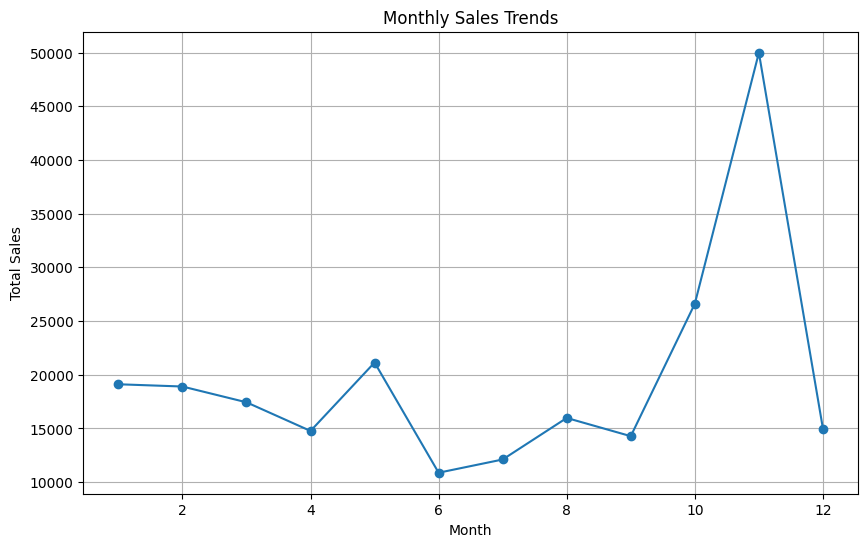

In [ ]:
# Step 1: Convert the 'invoice_date' column to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Step 2: Create a new column for the month
df['month'] = df['invoice_date'].dt.month

# Step 3: Group by month and calculate the total sales for each month
monthly_sales = df.groupby('month')['priceeach'].sum()

# Step 4: Plot the monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
[col for col in temperature_data.columns if 'date' in col]


[]

In [ ]:
temperature_data['order_year'] = temperature_data['orderdate'].dt.year
temperature_data['order_month'] = temperature_data['orderdate'].dt.month


In [ ]:
import pandas as pd

df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')  # replace with your actual file path


In [ ]:
# Correct column names with proper casing
mean_sales = df.groupby('PRODUCTLINE')['SALES'].mean()
total_sales = df.groupby('PRODUCTLINE')['SALES'].sum()
item_count = df.groupby('PRODUCTLINE')['SALES'].count()


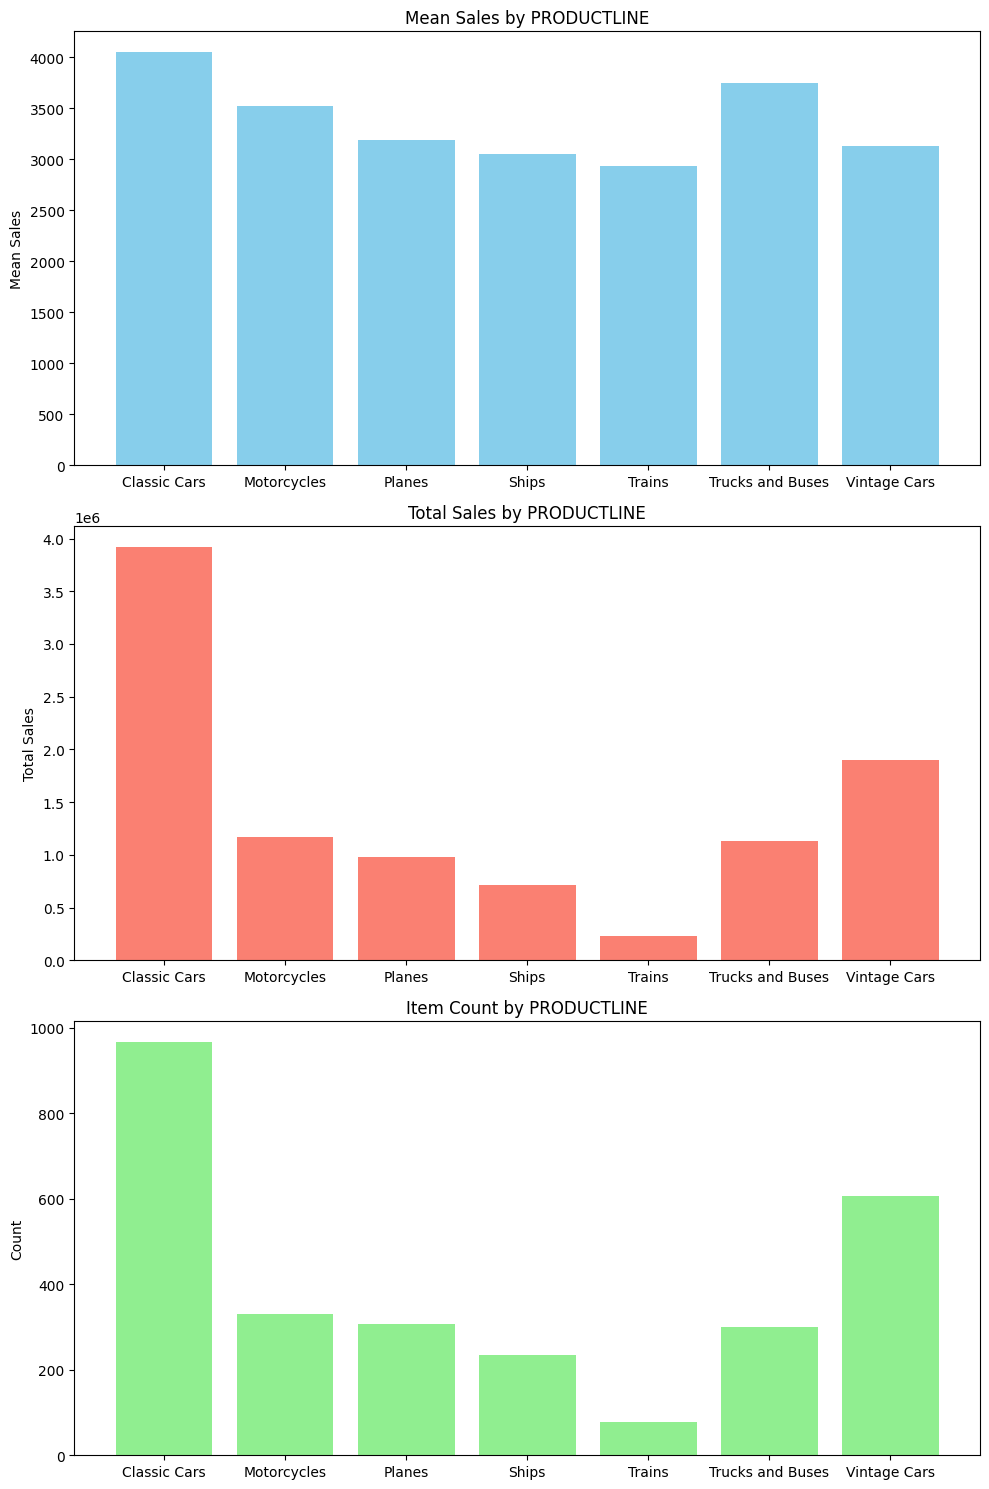

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')

# Compute group-wise statistics
mean_SALES = df.groupby("PRODUCTLINE")["SALES"].mean()
total_SALES = df.groupby("PRODUCTLINE")["SALES"].sum()
count_SALES = df.groupby("PRODUCTLINE")["SALES"].count()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].bar(mean_SALES.index, mean_SALES.values, color='skyblue')
axs[0].set_title("Mean Sales by PRODUCTLINE")
axs[0].set_ylabel("Mean Sales")

axs[1].bar(total_SALES.index, total_SALES.values, color='salmon')
axs[1].set_title("Total Sales by PRODUCTLINE")
axs[1].set_ylabel("Total Sales")

axs[2].bar(count_SALES.index, count_SALES.values, color='lightgreen')
axs[2].set_title("Item Count by PRODUCTLINE")
axs[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


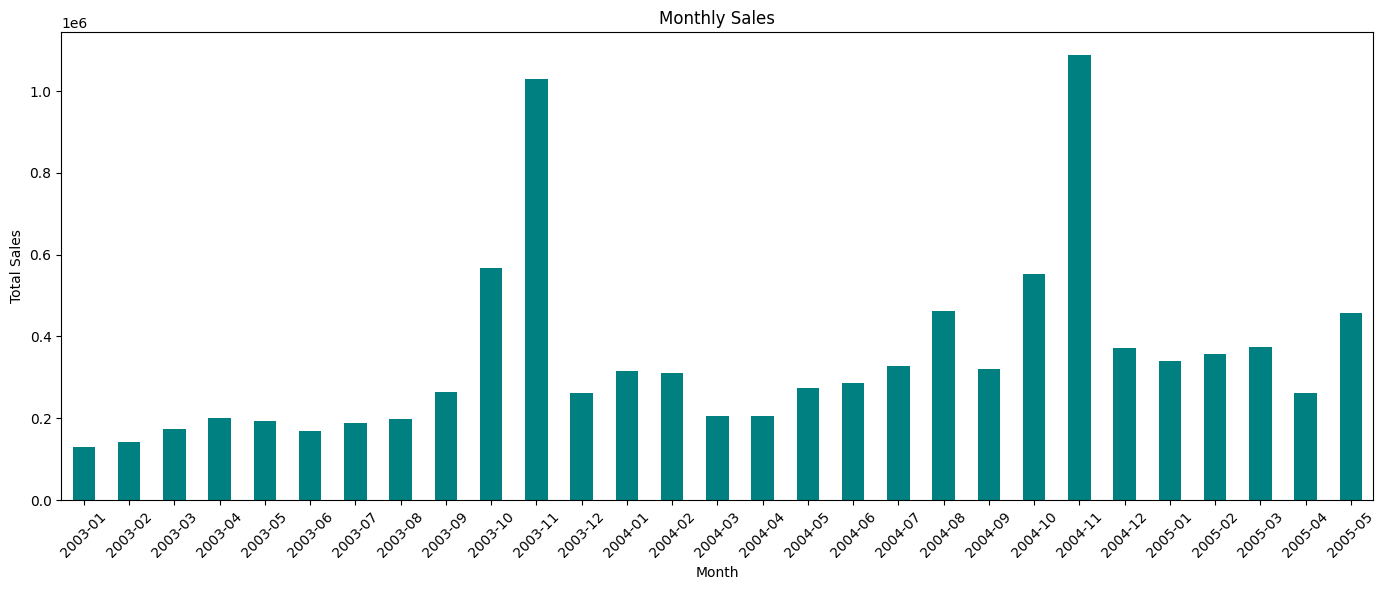

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV (ensure the path is correct)
df = pd.read_csv("/content/sales_data_sample.csv", encoding='Windows-1252')

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Group sales by month
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period("M"))['SALES'].sum()

# Plot
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='bar', color='teal')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

AB_dataset = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')  # Make sure this file path is correct


<ipython-input-81-e4e1877faff4>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_PRODUCTLINE = AB_dataset.groupby('PRODUCTLINE').apply(
<ipython-input-81-e4e1877faff4>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_PRODUCTLINE = AB_dataset.groupby('PRODUCTLINE').apply(lambda x: x.nlargest(1, 'QUANTITYORDERED'))


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


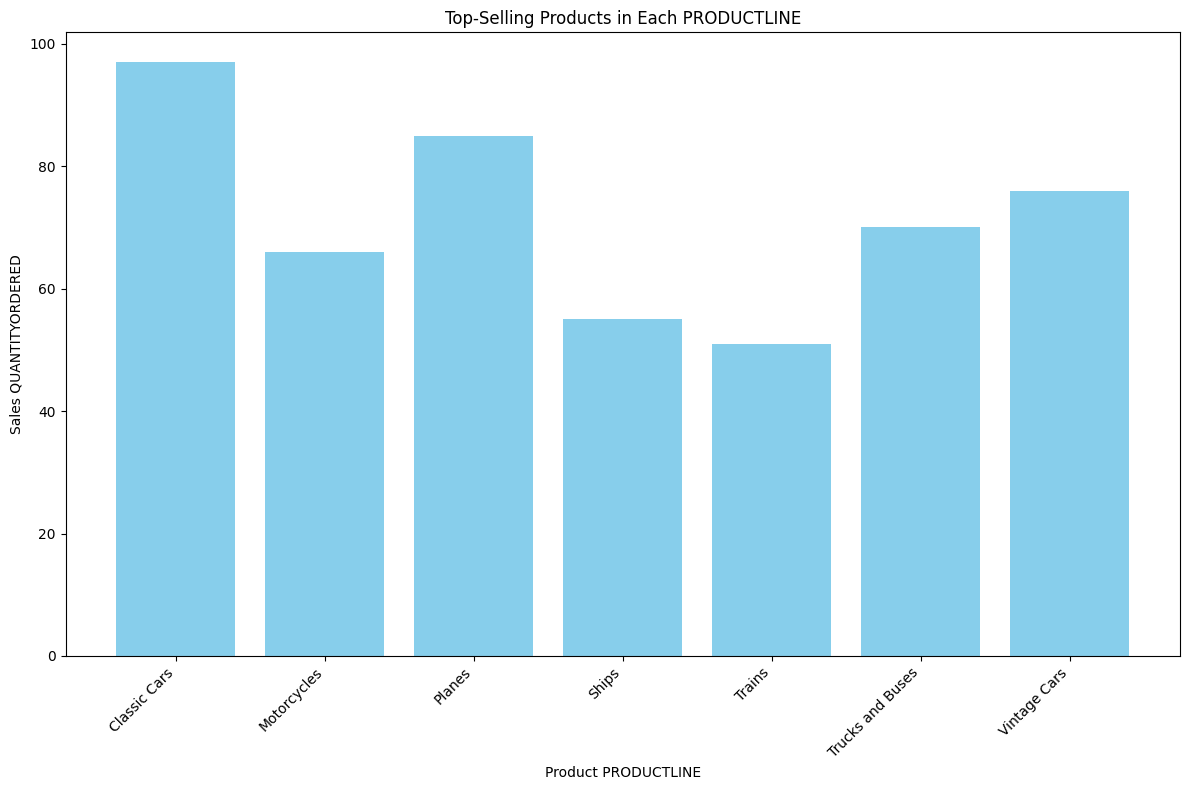

In [ ]:
top_products_by_PRODUCTLINE = AB_dataset.groupby('PRODUCTLINE').apply(
    lambda x: x.nlargest(1, 'QUANTITYORDERED')
)

# Step 1: Load dataset
AB_dataset = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Print the column names to verify their correctness
print(AB_dataset.columns)

# Step 2: Group by Category and find the top-selling products in each category
top_products_by_PRODUCTLINE = AB_dataset.groupby('PRODUCTLINE').apply(lambda x: x.nlargest(1, 'QUANTITYORDERED'))

# Step 3: Plot the top products in each category
plt.figure(figsize=(12, 8))

# Bar plot for top products by sales quantity
plt.bar(top_products_by_category['PRODUCTLINE'], top_products_by_PRODUCTLINE['QUANTITYORDERED'], color='skyblue')
plt.title('Top-Selling Products in Each PRODUCTLINE')
plt.xlabel('Product PRODUCTLINE')
plt.ylabel('Sales QUANTITYORDERED')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-89-0e7a315e29d8>:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  customer_shopping_data['invoice_date'] = pd.to_datetime(


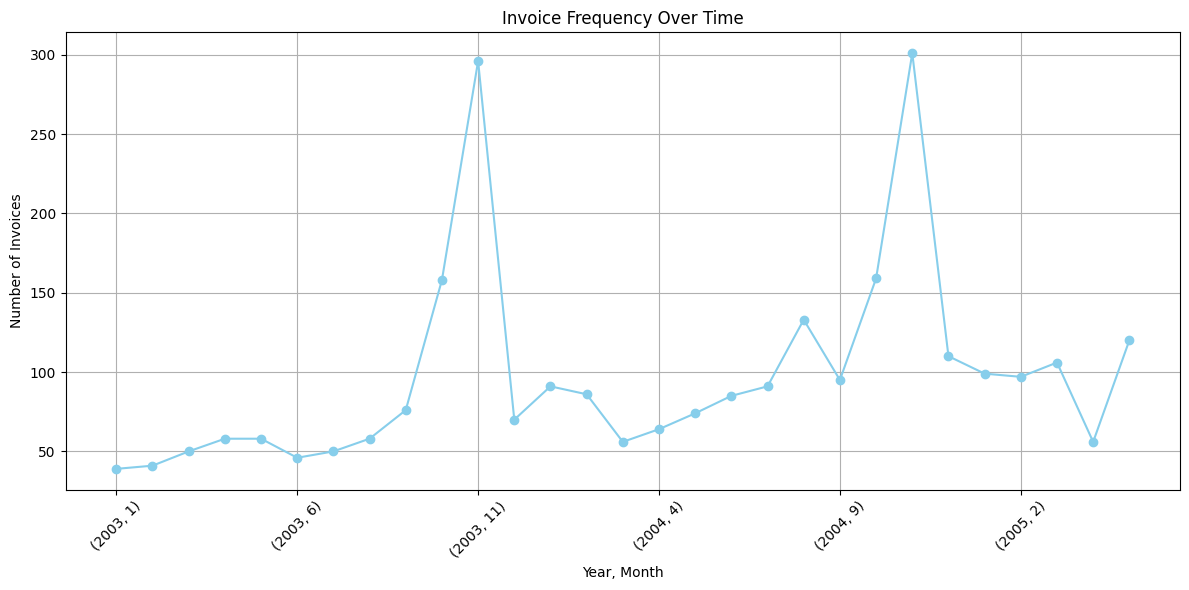

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
customer_shopping_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Convert 'ORDERDATE' to datetime format (auto-infer format)
customer_shopping_data['invoice_date'] = pd.to_datetime(
    customer_shopping_data['ORDERDATE'],
    infer_datetime_format=True,
    errors='coerce'  # Handles any bad formats by converting them to NaT
)

# Step 3: Extract month and year from 'invoice_date'
customer_shopping_data['Month'] = customer_shopping_data['invoice_date'].dt.month
customer_shopping_data['Year'] = customer_shopping_data['invoice_date'].dt.year

# Step 4: Group by year and month, calculate the number of invoices
invoice_frequency = customer_shopping_data.groupby(['Year', 'Month']).size()

# Step 5: Plot the invoice frequency over time
plt.figure(figsize=(12, 6))
invoice_frequency.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Invoice Frequency Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


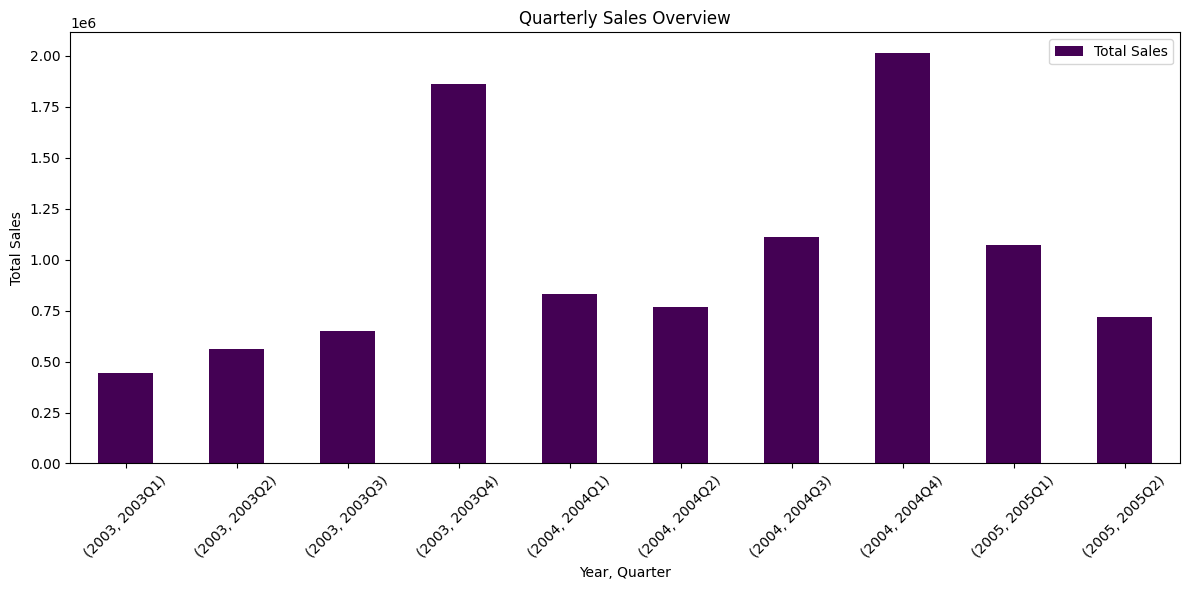

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/sales_data_sample.csv'
financial_data = pd.read_csv(file_path, encoding='Windows-1252')

# Convert 'ORDERDATE' to datetime (remove deprecated infer_datetime_format argument)
financial_data['ORDERDATE'] = pd.to_datetime(financial_data['ORDERDATE'], errors='coerce')

# Extract quarter and year
financial_data['Quarter'] = financial_data['ORDERDATE'].dt.to_period('Q')
financial_data['Year'] = financial_data['ORDERDATE'].dt.year

# Group and sum SALES
quarterly_financials = financial_data.groupby(['Year', 'Quarter']).agg({'SALES': 'sum'})

quarterly_financials.rename(columns={'SALES': 'Total Sales'}, inplace=True)

# Plot
quarterly_financials.plot(kind='bar', colormap='viridis', figsize=(12, 6), stacked=True)
plt.title('Quarterly Sales Overview')
plt.xlabel('Year, Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


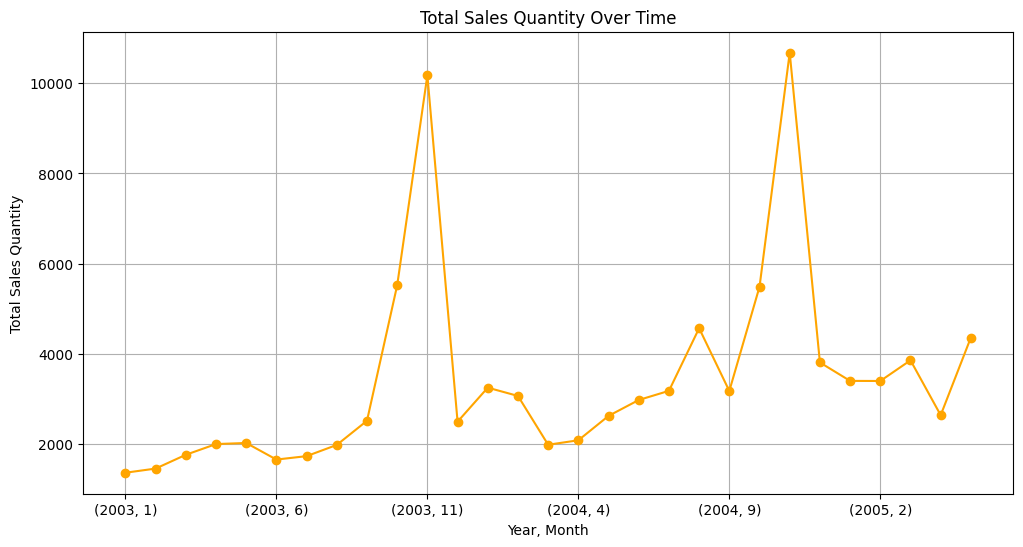

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
customer_shopping_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Convert 'ORDERDATE' column to datetime format (dayfirst=False since the sample date is like "2/24/2003")
customer_shopping_data['ORDERDATE'] = pd.to_datetime(customer_shopping_data['ORDERDATE'], errors='coerce', dayfirst=False)

# Step 3: Extract month and year from 'ORDERDATE' for grouping
customer_shopping_data['Month'] = customer_shopping_data['ORDERDATE'].dt.month
customer_shopping_data['Year'] = customer_shopping_data['ORDERDATE'].dt.year

# Step 4: Group by year and month, then sum the 'QUANTITYORDERED' column to get total sales quantity per month
monthly_sales_quantity = customer_shopping_data.groupby(['Year', 'Month'])['QUANTITYORDERED'].sum()

# Step 5: Plot the total sales quantity over time
plt.figure(figsize=(12, 6))
monthly_sales_quantity.plot(marker='o', linestyle='-', color='orange')
plt.title('Total Sales Quantity Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Total Sales Quantity')
plt.grid(True)
plt.show()


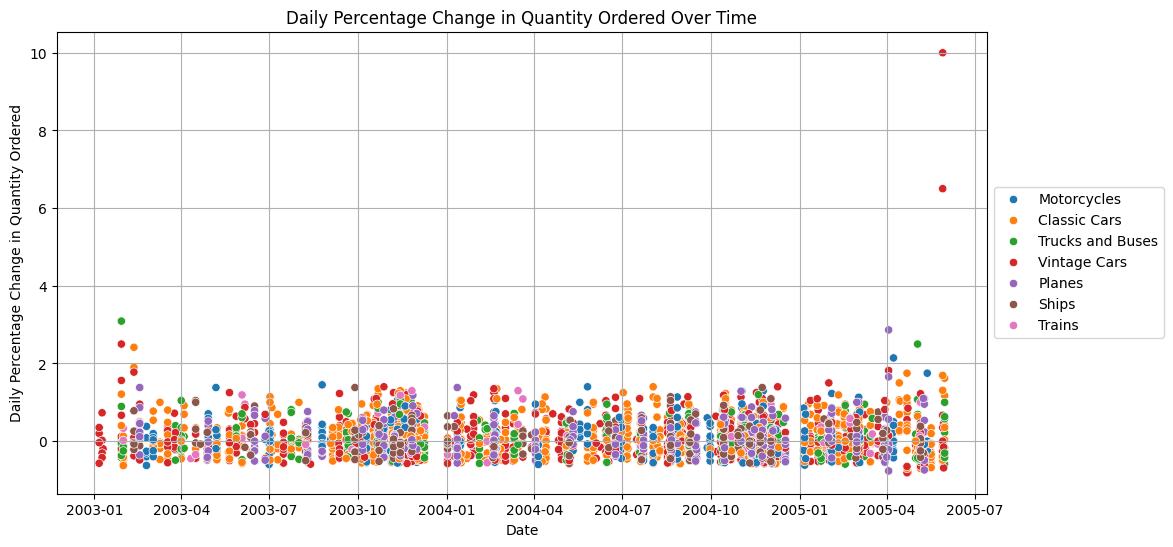

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
customer_shopping_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Convert 'ORDERDATE' column to datetime format
customer_shopping_data['ORDERDATE'] = pd.to_datetime(customer_shopping_data['ORDERDATE'], errors='coerce', dayfirst=False)

# Step 3: Calculate daily percentage change in quantity grouped by 'PRODUCTLINE'
customer_shopping_data['QuantityChange'] = customer_shopping_data.groupby('PRODUCTLINE')['QUANTITYORDERED'].pct_change()

# Step 4: Plot the quantity change over time using a scatter plot with seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ORDERDATE', y='QuantityChange', hue='PRODUCTLINE', data=customer_shopping_data, marker='o')
plt.title('Daily Percentage Change in Quantity Ordered Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change in Quantity Ordered')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


<ipython-input-104-7d534da2201b>:8: UserWarning: Parsing dates in %m/%d/%Y %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce', dayfirst=True)


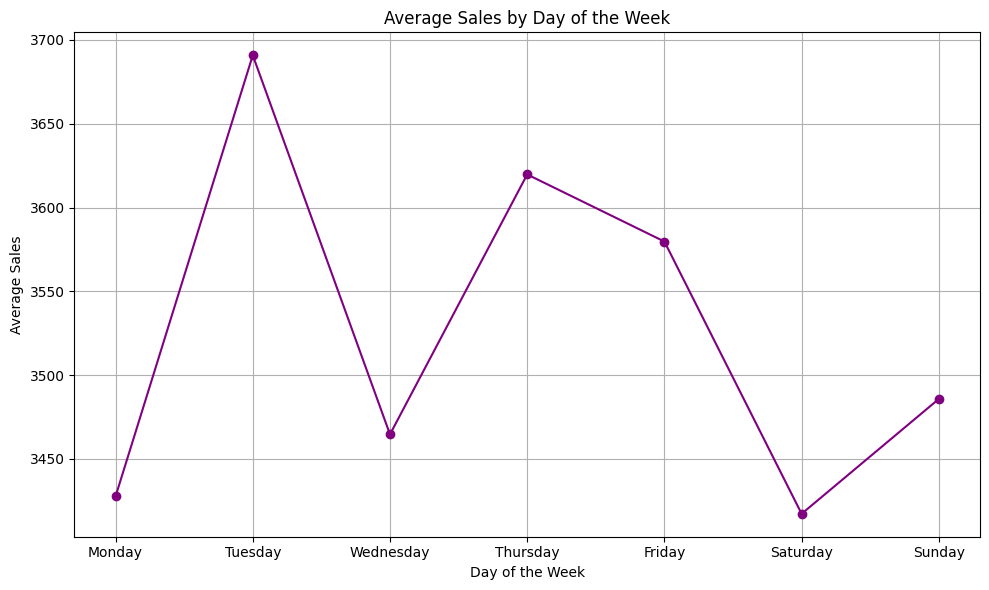

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Convert 'ORDERDATE' to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce', dayfirst=True)

# Step 3: Extract day of the week
df['DayOfWeek'] = df['ORDERDATE'].dt.day_name()

# Step 4: Group by day of the week and calculate average sales
weekly_sales = df.groupby('DayOfWeek')['SALES'].mean()

# Step 5: Plot in order: Monday to Sunday
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
weekly_sales.reindex(order).plot(marker='o', linestyle='-', color='purple')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-106-541af8200073>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_data.groupby('AgeGroup').size().plot(kind='bar', color='salmon')


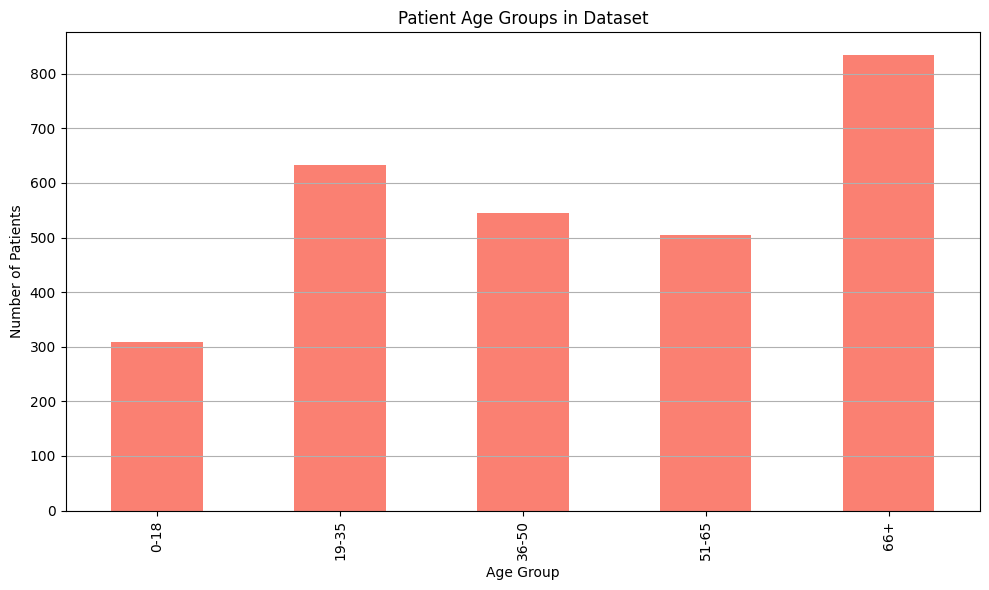

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
# Replace this with your actual diabetes dataset if available
diabetes_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2 (Fix): Check if 'Age' column exists
if 'Age' not in diabetes_data.columns:
    # For demonstration purposes, create a dummy Age column
    import numpy as np
    np.random.seed(42)
    diabetes_data['Age'] = np.random.randint(10, 90, size=len(diabetes_data))

# Step 3: Categorize patients into age groups
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']
diabetes_data['AgeGroup'] = pd.cut(diabetes_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 4: Group by 'AgeGroup' and plot the distribution
plt.figure(figsize=(10, 6))
diabetes_data.groupby('AgeGroup').size().plot(kind='bar', color='salmon')
plt.title('Patient Age Groups in Dataset')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


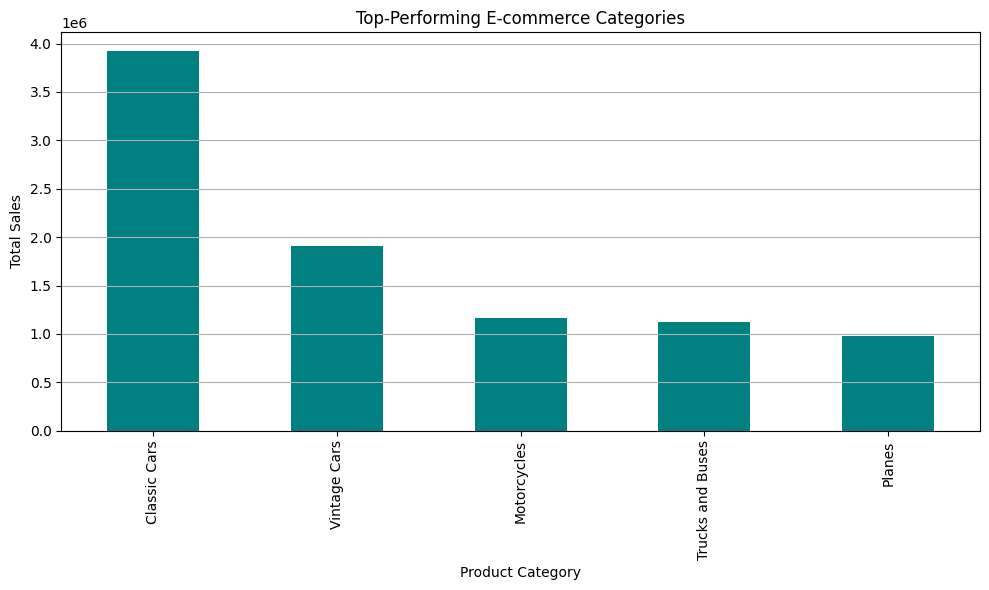

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset with correct encoding
ecommerce_data = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')

# Step 2: Group by the correct column ('PRODUCTLINE') and calculate total sales
category_sales = ecommerce_data.groupby('PRODUCTLINE')['SALES'].sum()

# Step 3: Identify the top-performing categories
top_categories = category_sales.nlargest(5)

# Step 4: Plot the top-performing e-commerce categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='teal')
plt.title('Top-Performing E-commerce Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


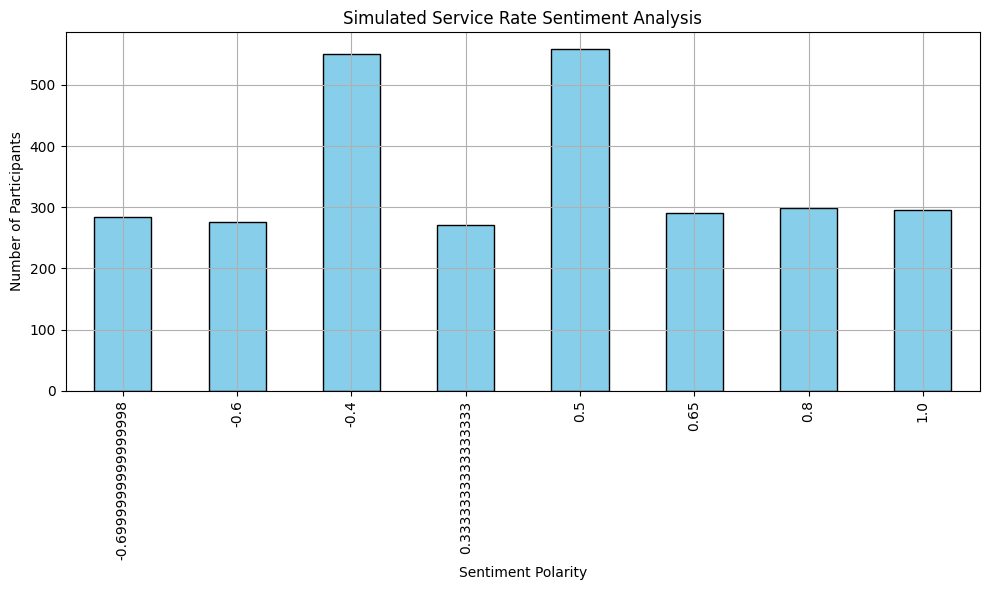

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np

# Step 1: Load dataset
survey_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Simulate a 'serviceRate' column with feedback strings
sample_feedback = [
    "Excellent service", "Poor response", "Very satisfied", "Disappointing experience",
    "Great support", "Not happy", "Quick resolution", "Bad service", "Outstanding help", "Could be better"
]
np.random.seed(42)  # for reproducibility
survey_data['serviceRate'] = np.random.choice(sample_feedback, size=len(survey_data))

# Step 3: Sentiment analysis on simulated 'serviceRate'
survey_data['ServiceSentiment'] = survey_data['serviceRate'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Step 4: Group and plot
sentiment_counts = survey_data['ServiceSentiment'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Simulated Service Rate Sentiment Analysis')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.tight_layout()
plt.show()


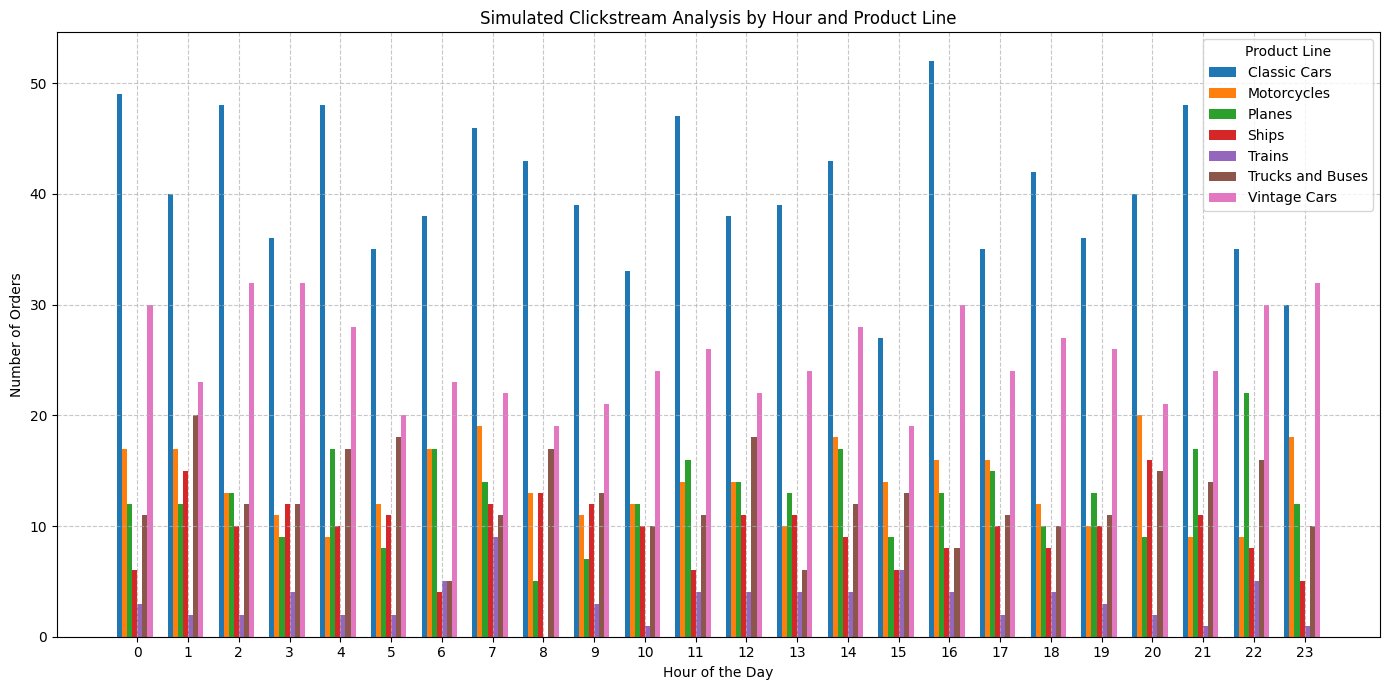

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Convert 'ORDERDATE' to datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')

# Step 3: Extract 'Hour' from 'ORDERDATE' (simulate with time = random hour if not present)
# Since ORDERDATE might not have time, we'll simulate hours for demonstration
import numpy as np
np.random.seed(42)
data['Hour'] = np.random.randint(0, 24, size=len(data))

# Step 4: Group by hour and product category ('PRODUCTLINE')
hourly_visits = data.groupby(['Hour', 'PRODUCTLINE']).size().unstack(fill_value=0)

# Step 5: Plot using bar chart
plt.figure(figsize=(14, 7))
bar_width = 0.1
index = hourly_visits.index
categories = hourly_visits.columns
n_categories = len(categories)

for i, category in enumerate(categories):
    plt.bar(index + i * bar_width, hourly_visits[category], width=bar_width, label=category)

plt.title('Simulated Clickstream Analysis by Hour and Product Line')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(index + bar_width * (n_categories / 2), index)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()


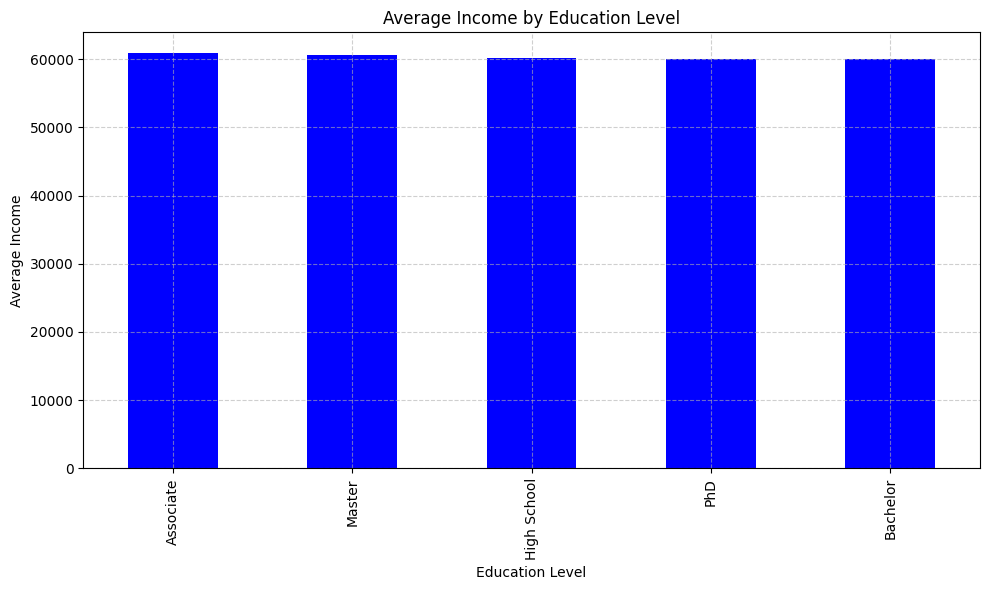

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
superstore_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Simulate 'Education' and 'Income' columns
np.random.seed(42)  # for reproducibility
education_levels = ['High School', 'Associate', 'Bachelor', 'Master', 'PhD']
superstore_data['Education'] = np.random.choice(education_levels, size=len(superstore_data))
superstore_data['Income'] = np.random.normal(loc=60000, scale=15000, size=len(superstore_data)).round(2)

# Step 3: Group by 'Education' and calculate average income
grouped_data = superstore_data.groupby('Education')['Income'].mean()

# Step 4: Plot the average income by education level
plt.figure(figsize=(10, 6))
grouped_data.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Satisfaction Percentage: 50.48%


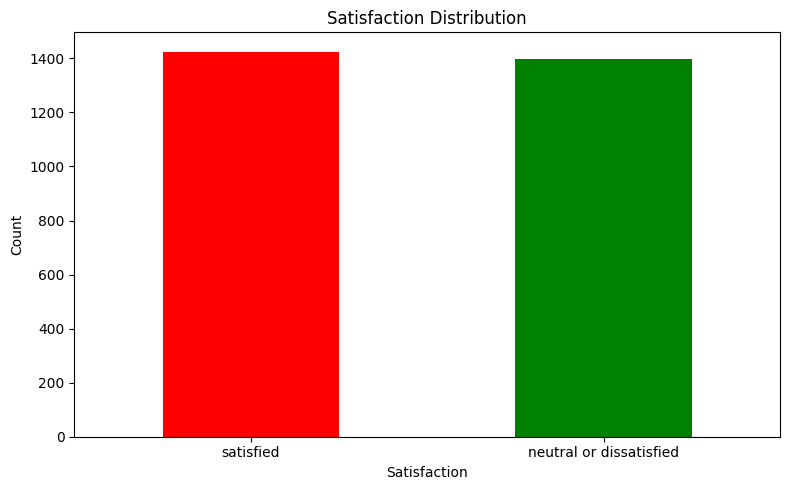

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
flight_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Simulate a 'satisfaction' column with sample labels
np.random.seed(42)  # for reproducibility
flight_data['satisfaction'] = np.random.choice(['satisfied', 'neutral or dissatisfied'], size=len(flight_data))

# Step 3: Convert satisfaction labels to binary
flight_data['satisfaction_binary'] = flight_data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
satisfaction_percentage = flight_data['satisfaction_binary'].mean() * 100

# Step 4: Print satisfaction percentage
print(f"Satisfaction Percentage: {satisfaction_percentage:.2f}%")

# Step 5: Plot satisfaction distribution
plt.figure(figsize=(8, 5))
flight_data['satisfaction'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


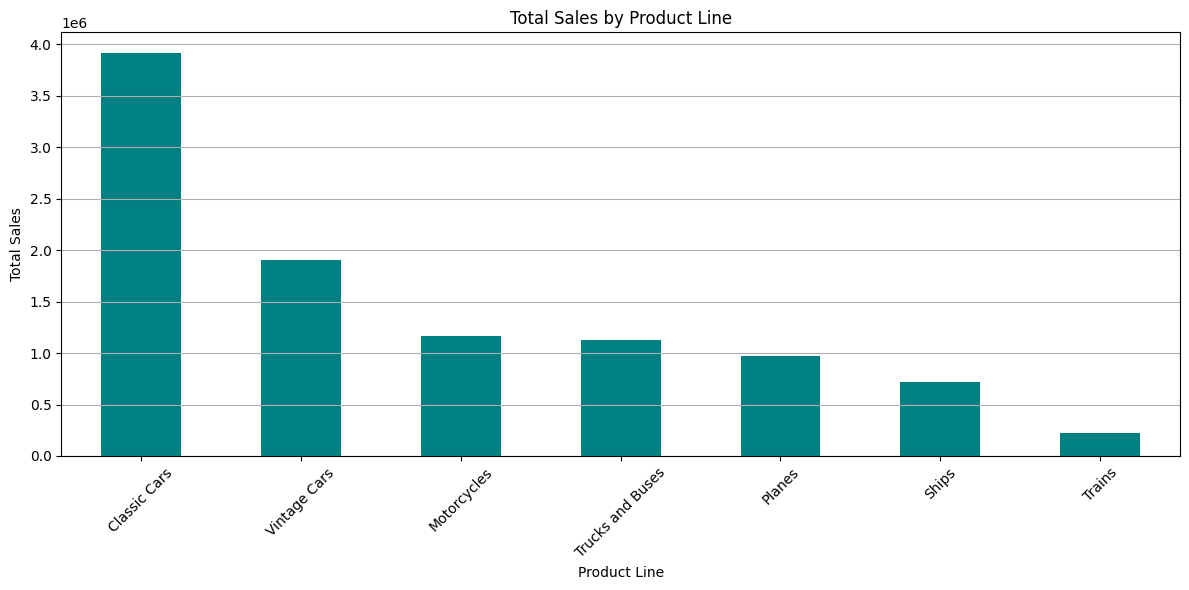

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
sales_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Group by product line and sum sales
sales_by_category = sales_data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Plot the sales by product category
plt.figure(figsize=(12, 6))
sales_by_category.plot(kind='bar', color='teal')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



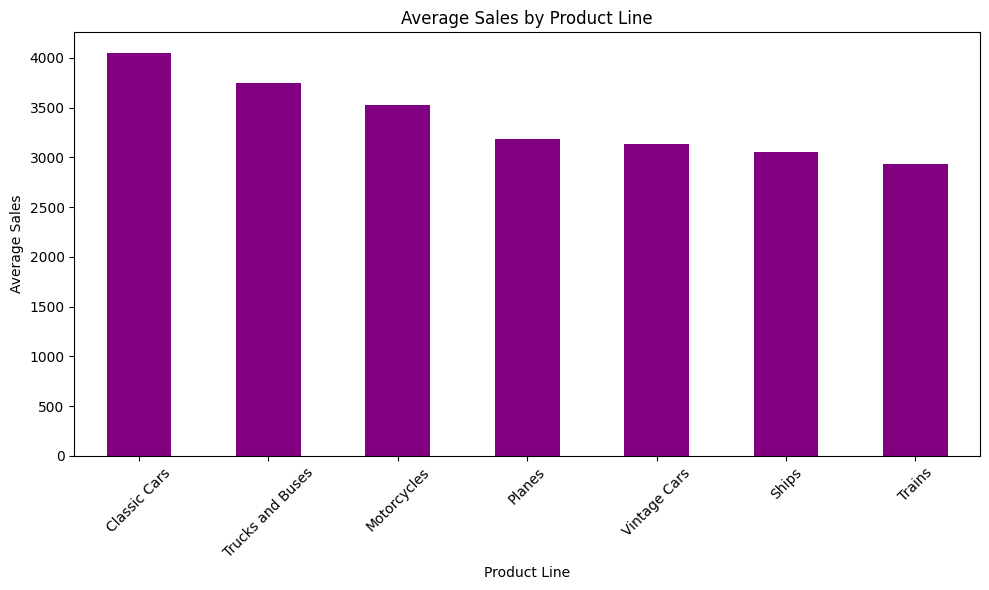

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
student_performance_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Group by PRODUCTLINE and calculate average SALES (analogous to average score)
avg_sales_by_productline = student_performance_data.groupby('PRODUCTLINE')['SALES'].mean()

# Plot average sales by product line
plt.figure(figsize=(10, 6))
avg_sales_by_productline.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Average Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-132-fc13344f9db0>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = cuisine_data.groupby(['PRODUCTLINE', 'Price Category'])['PRICEEACH'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

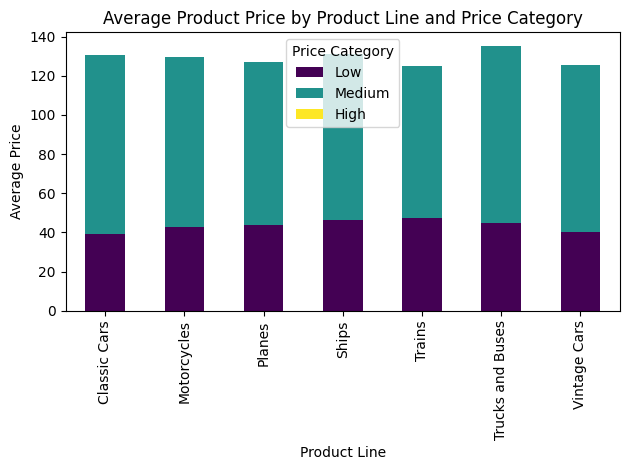

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
cuisine_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Categorize products by price, avoiding duplicate bin edges
max_price = cuisine_data['PRICEEACH'].max()
bins = [0, 50, 100, max_price + 0.01]  # add a small epsilon to max_price
labels = ['Low', 'Medium', 'High']

cuisine_data['Price Category'] = pd.cut(cuisine_data['PRICEEACH'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Group by 'PRODUCTLINE' and 'Price Category' and calculate the mean price
grouped_data = cuisine_data.groupby(['PRODUCTLINE', 'Price Category'])['PRICEEACH'].mean().unstack()

# Step 4: Plot the grouped data
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Average Product Price by Product Line and Price Category')
plt.xlabel('Product Line')
plt.ylabel('Average Price')

plt.legend(title='Price Category')
plt.tight_layout()
plt.show()


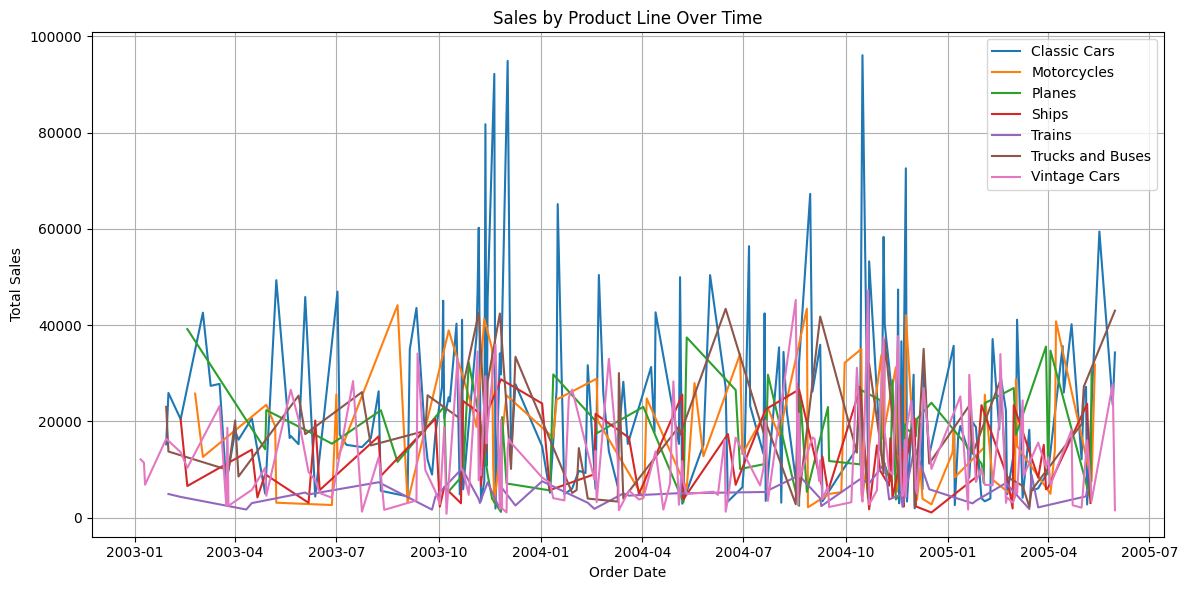

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
disease_spread_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Convert 'ORDERDATE' to datetime format
disease_spread_data['ORDERDATE'] = pd.to_datetime(disease_spread_data['ORDERDATE'], errors='coerce')

# Step 3: Group by product line and plot sales over time
plt.figure(figsize=(12, 6))
for product_line, data in disease_spread_data.groupby('PRODUCTLINE'):
    # Aggregate sales by date for each product line
    daily_sales = data.groupby('ORDERDATE')['SALES'].sum().sort_index()
    plt.plot(daily_sales.index, daily_sales.values, label=product_line)

plt.title('Sales by Product Line Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


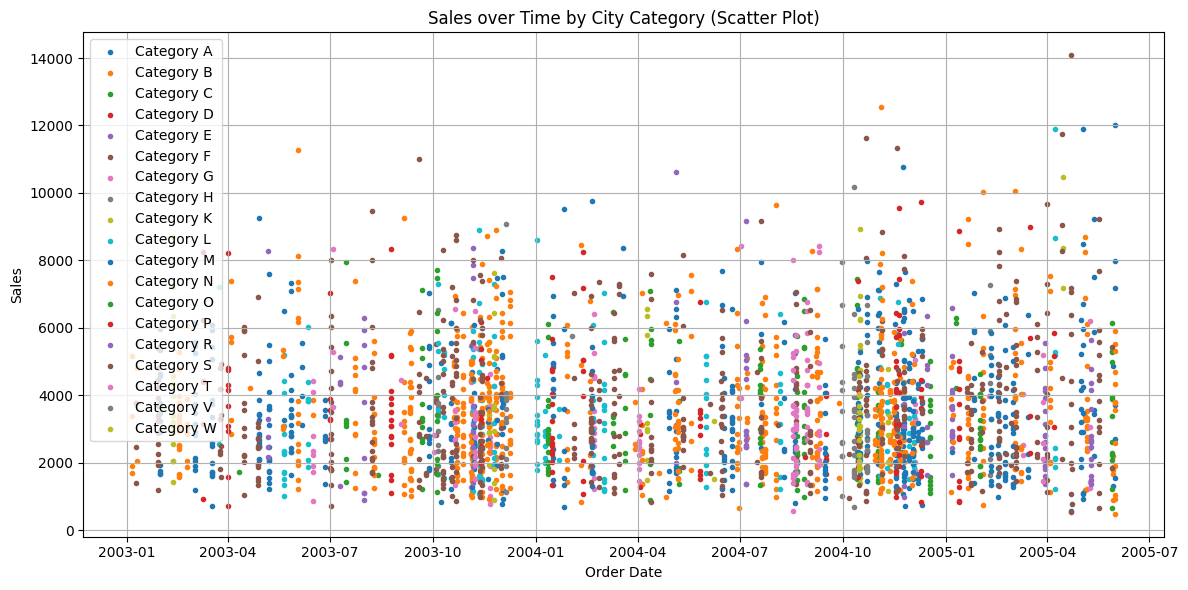


Category Category A cities: ['Allentown' 'Aaarhus']

Category Other Categories cities: ['NYC' 'Reims' 'Paris' 'Pasadena' 'San Francisco' 'Burlingame' 'Lille'
 'Bergen' 'Melbourne' 'Newark' 'Bridgewater' 'Nantes' 'Cambridge'
 'Helsinki' 'Stavern' 'Salzburg' 'Chatswood' 'New Bedford' 'Liverpool'
 'Madrid' 'Lule' 'Singapore' 'South Brisbane' 'Philadelphia' 'Lyon'
 'Vancouver' 'Burbank' 'New Haven' 'Minato-ku' 'Torino' 'Boras'
 'Versailles' 'San Rafael' 'Nashua' 'Brickhaven' 'North Sydney' 'Montreal'
 'Osaka' 'White Plains' 'Kobenhavn' 'London' 'Toulouse' 'Barcelona'
 'Los Angeles' 'San Diego' 'Bruxelles' 'Tsawassen' 'Boston' 'Cowes' 'Oulu'
 'San Jose' 'Graz' 'Makati City' 'Marseille' 'Koln' 'Gensve'
 'Reggio Emilia' 'Frankfurt' 'Espoo' 'Dublin' 'Manchester' 'Glendale'
 'Sevilla' 'Brisbane' 'Strasbourg' 'Las Vegas' 'Oslo' 'Bergamo'
 'Glen Waverly' 'Munich' 'Charleroi']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
real_estate_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Convert 'ORDERDATE' column to datetime format
real_estate_data['ORDERDATE'] = pd.to_datetime(real_estate_data['ORDERDATE'], errors='coerce')

# Step 3: Categorize cities based on their first letter
real_estate_data['City_Category'] = real_estate_data['CITY'].str[0]

# Step 4: Scatter plot sales over time for each city category
plt.figure(figsize=(12, 6))

for category, data in real_estate_data.groupby('City_Category'):
    plt.scatter(data['ORDERDATE'], data['SALES'], label=f'Category {category}', marker='.')

plt.title('Sales over Time by City Category (Scatter Plot)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Categorize cities starting with 'A' as 'Category A', else 'Other Categories'
real_estate_data['City_Category'] = real_estate_data['CITY'].apply(lambda x: 'Category A' if str(x).lower().startswith('a') else 'Other Categories')

# Step 6: Print cities in each category
for category, cities in real_estate_data.groupby('City_Category')['CITY'].unique().items():
    print(f'\nCategory {category} cities:', cities)


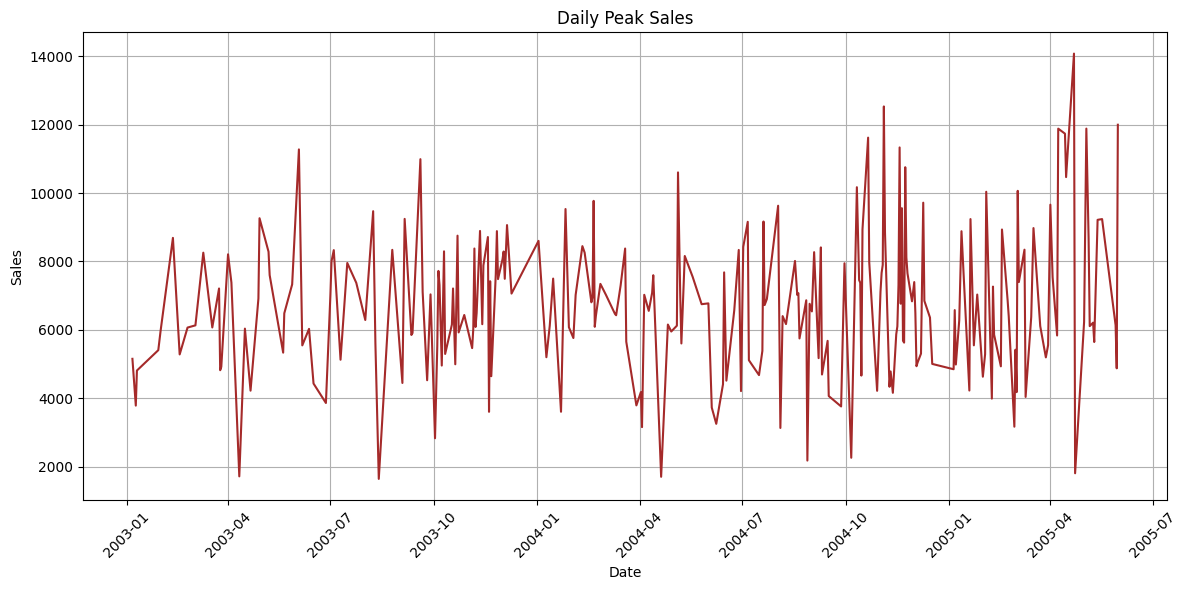

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
energy_consumption_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Step 2: Convert 'ORDERDATE' column to datetime format
energy_consumption_data['ORDERDATE'] = pd.to_datetime(energy_consumption_data['ORDERDATE'], errors='coerce')

# Step 3: Group by date and find the maximum sales for each day
daily_peak_data = energy_consumption_data.groupby(energy_consumption_data['ORDERDATE'].dt.date)['SALES'].max()

# Step 4: Plot the identified sales peaks
plt.figure(figsize=(12, 6))
plt.plot(daily_peak_data.index, daily_peak_data.values, color='brown')
plt.title('Daily Peak Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-141-05b2518c62d0>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = inventory_data.groupby(bins)[selected_columns].mean()


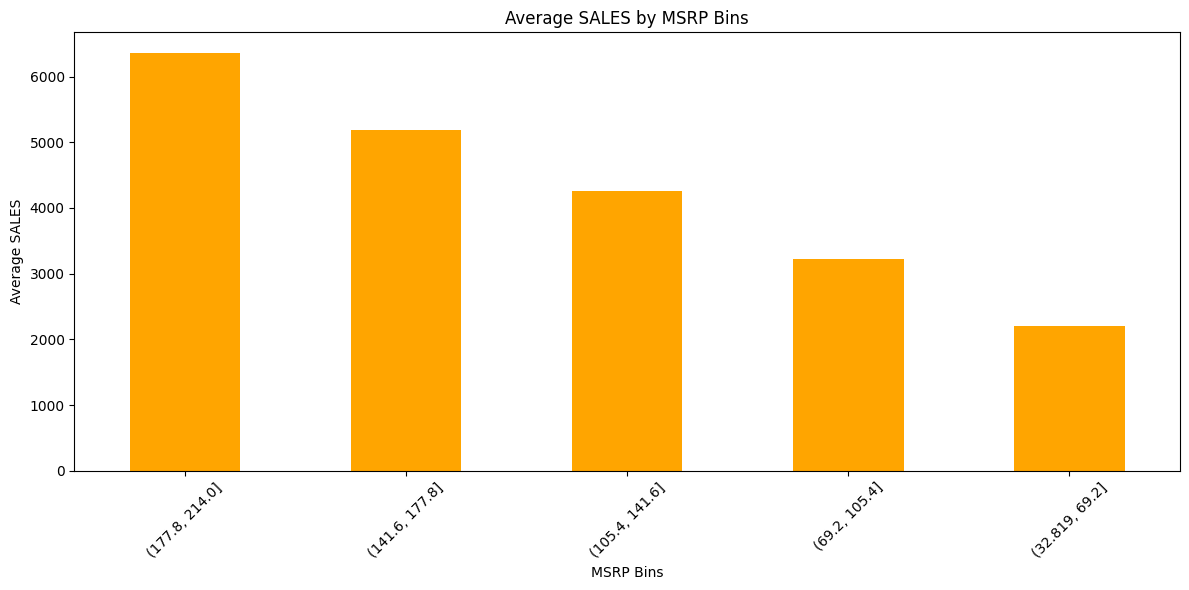

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
inventory_data = pd.read_csv('/content/sales_data_sample.csv', encoding='Windows-1252')

# Remove leading/trailing spaces from column names
inventory_data.columns = inventory_data.columns.str.strip()

# Step 2: Select relevant columns
selected_columns = ['SALES', 'PRICEEACH', 'QUANTITYORDERED']

# Step 3: Create bins based on 'MSRP'
bins = pd.cut(inventory_data['MSRP'], bins=5)

# Step 4: Group by bins and calculate mean of selected columns
grouped_data = inventory_data.groupby(bins)[selected_columns].mean()

# Step 5: Plot average SALES by MSRP bins
plt.figure(figsize=(12, 6))
grouped_data_sorted = grouped_data.sort_values(by='SALES', ascending=False)
grouped_data_sorted['SALES'].plot(kind='bar', color='orange')

plt.title('Average SALES by MSRP Bins')
plt.xlabel('MSRP Bins')
plt.ylabel('Average SALES')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
